# Ayush Bajgai

## Statement of the Problem:

The objective is to construct a pattern recognition model that use Logistic Regression to categorize photos in the Fashion-MNIST dataset. The Fashion-MNIST dataset consists of grayscale photographs depicting 10 distinct categories of clothing items. The objective is to provide precise predictions about the category of each clothing item using the image data.

**Questions to Ask:**

i. To what extent does the Logistic Regression model demonstrate accuracy in the classification of Fashion-MNIST images?

ii. Which level of generalization does the model exhibit towards unseen data?

iii. Which visual features provide the highest level of contribution to precise classification?

iv. How does the analytical accuracy of Logistic Regression on the Fashion-MNIST dataset compare to its accuracy on the MNIST dataset, which includes handwritten digits?

v. Do the classification of clothing items present any unique issues compared to the classification of handwritten digits?

## Overview of the Dataset:

The Fashion-MNIST dataset consists of 28x28 pixel grayscale images representing 10 distinct clothing categories. Each image is assigned a label from a set of 10 classes:

T-shirt/top, Trouser, Pullover, Dress, Coa,t Sandal, Sneake,r Bag, Ankle, boot

**Descriptive attributes of the dataset:**

**Images:** Each image consists of 28x28 pixels in grayscale, resulting in a 784-dimensional vector representation (28x28=784).

**Categorization:** The dataset has 60,000 training photos and 10,000 test images, each image categorized into one of the 10 defined groups.
Special  Features:

**Class Imbalance:** Verify the degree of equal representation of the classes. Model performance may be impacted by imbalance. Computational Image Preprocessing: Pixel value normalization, which involves scaling between 0 and 1, is commonly carried out to enhance model performance.

**Dimensionality:** Optimal handling of the 784 characteristics in Logistic Regression may require the use of dimensionality reduction techniques or regularization.

In machine learning, Logistic Regression is a fundamental and extensively employed classification algorithm. This algorithm is especially well-suited for solving binary and multiclass classification issues. A comprehensive elucidation of Logistic Regression and its applicability to the Fashion-MNIST dataset and the current challenge is provided.

Logistic Regression is a statistical predictive model used to estimate the likelihood of a binary event or a multiclass classification. Modeling the link between a dependent binary variable (outcome) and one or more independent variables (features) is undertaken using this approach.

Logistic Regression is an appropriate model for this problem for the following justifications:

**i. Multi-class classification:**
The Fashion-MNIST dataset comprises 10 unique categories, so presenting a multiclass classification challenge. By utilizing the softmax function, Logistic Regression may be modified to accommodate multiclass classification, enabling it to effectively handle more than two classes.

**ii. Conceptual clarity and comprehensibility:**
In comparison to more intricate models such as deep neural networks, Logistic Regression is rather straightforward. Due to its interpretability, it serves as an excellent initial reference for setting a performance baseline.

**iii. Efficiency:**
Computationally efficient, Logistic Regression excels with high-dimensional data such as image data, which consists of flattened 28x28 pixel images converted into a 784-dimensional vector.

**iv. Baseline Model:**
Logistic Regression serves as a fundamental model that establishes a reference point. Further sophisticated models, such as neural networks, can be compared to it in order to assess whether increased complexity results in a substantial enhancement in performance.

In [3]:
import pandas as pd
from sklearn.datasets import fetch_openml

1) Loading Dataset

In [5]:
#Loading the testing and training dataset
training_dataset = pd.read_csv('fashion-mnist_train.csv')
testing_dataset = pd.read_csv('fashion-mnist_test.csv')

2) Viewing Datadset

In [7]:
#here we view the training and testing dataset
training_dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
testing_dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


3) Data Exploration

In [10]:
#Exploring data for training
training_dataset.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [11]:
#Exploring data for testing
testing_dataset.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [12]:
#Exploring keys of training
training_dataset.keys()

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [13]:
#Exploring keys of testing
testing_dataset.keys()

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [14]:
#Getting number of points and featues of testing and training dataset
print("The feature of testing dataset is: ",testing_dataset.shape)

The feature of testing dataset is:  (10000, 785)


In [15]:
print("The feature of training dataset is: ", training_dataset.shape)

The feature of training dataset is:  (60000, 785)


In [16]:
#Now we're defining labels for training dataset
training_dataset['label'].value_counts()

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

4) Data Visualization

<Axes: xlabel='label', ylabel='count'>

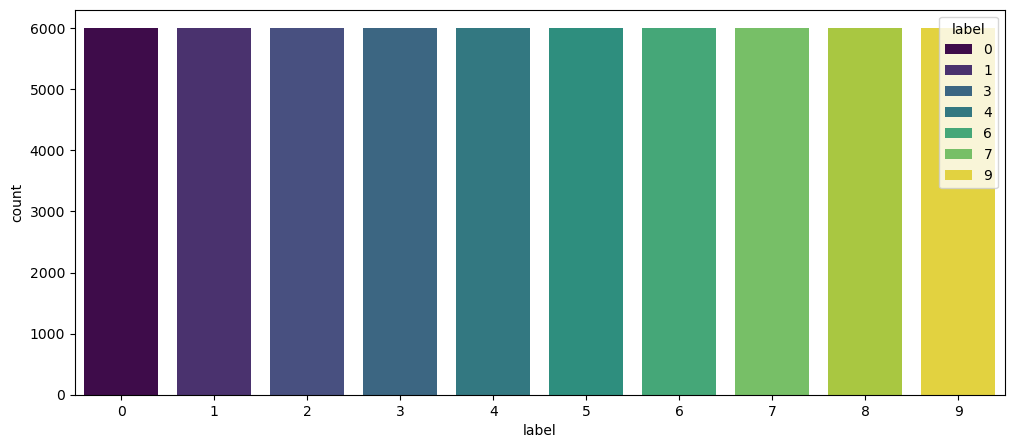

In [18]:
#Viewing training dataset labels into various colors
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,5))
sns.countplot(x = 'label', hue = 'label', data = training_dataset, palette = 'viridis')

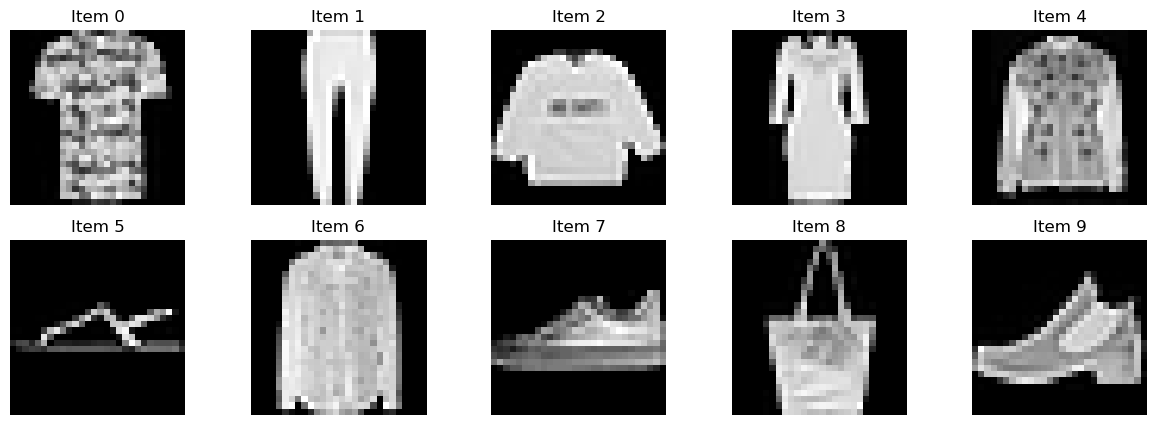

In [19]:
# Take a multiple images, and remove the color dimension by reshaping
import numpy as np

# Assuming 'train' has columns 'label' and pixel columns
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = training_dataset[training_dataset.label == i].iloc[0,1:].values
    img = img.reshape((28,28))
    plt.imshow(img,cmap = 'gray')
    plt.title("Item "+ str(i))
    plt.axis('off')
plt.show()

5) Spliting intro Training and Testing Dataset

In [21]:
#This is for training dataset
x_train=training_dataset.drop('label',axis=1)
y_train=training_dataset['label']

#The traing set values for the training dataset
print(x_train.shape, y_train.shape)

(60000, 784) (60000,)


In [22]:
#This is for testing dataset and we drop the column named as Label
x_test=testing_dataset.drop('label',axis=1)
y_test=testing_dataset['label']

#The traing set values for the training dataset
print(x_test.shape, y_test.shape)

(10000, 784) (10000,)


6) Applying Logistic Regression

In [24]:
#building logistic model to classify MNIST images
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

For Training Dataset

In [26]:
lr_model = LogisticRegression()

In [27]:
lr_model.fit(x_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
#Training model to generate prediction on the training dataset
y_predict_lr=lr_model.predict(x_train)

print('Predicted testing array: ', y_predict_lr)

Predicted testing array:  [8 9 6 ... 8 8 7]


For Testing Dataset

In [30]:
from sklearn.metrics import accuracy_score

print('Accuracy score of the training dataset is: ', accuracy_score(y_predict_lr, y_train))

Accuracy score of the training dataset is:  0.8620833333333333


In [31]:
#Generating the classification report for training
print(classification_report(y_train, y_predict_lr))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      6000
           1       0.97      0.97      0.97      6000
           2       0.77      0.76      0.77      6000
           3       0.87      0.88      0.87      6000
           4       0.74      0.81      0.77      6000
           5       0.96      0.91      0.93      6000
           6       0.70      0.60      0.64      6000
           7       0.92      0.94      0.93      6000
           8       0.94      0.95      0.95      6000
           9       0.94      0.95      0.95      6000

    accuracy                           0.86     60000
   macro avg       0.86      0.86      0.86     60000
weighted avg       0.86      0.86      0.86     60000



In [32]:
lr_model.fit(x_test, y_test)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
#Training model to generate prediction on the testing dataset
y_predict_lr2=lr_model.predict(x_test)

print('Predicted testing array: ', y_predict_lr2)

Predicted testing array:  [0 1 2 ... 8 8 2]


In [34]:
from sklearn.metrics import accuracy_score

print('Accuracy score of the testing dataset is: ', accuracy_score(y_predict_lr2 , y_test))

Accuracy score of the testing dataset is:  0.8895


In [35]:
#Generating the classification report for testing
print(classification_report(y_test, y_predict_lr2))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.80      0.82      0.81      1000
           3       0.91      0.91      0.91      1000
           4       0.80      0.86      0.83      1000
           5       0.96      0.92      0.94      1000
           6       0.76      0.67      0.71      1000
           7       0.92      0.95      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



7) Result Visualization

In [44]:
#Generating Confusion Matrix for Testing Dataset
confusion_matrix(y_train, y_predict_lr)

array([[5058,   34,  103,  221,   38,    2,  463,    3,   75,    3],
       [  18, 5810,   27,  107,   16,    0,   18,    1,    3,    0],
       [  92,   20, 4566,   65,  764,    3,  438,    1,   51,    0],
       [ 186,   99,   55, 5277,  207,    1,  157,    1,   17,    0],
       [   9,   13,  478,  206, 4863,    1,  405,    0,   25,    0],
       [   5,    3,    2,    1,    0, 5484,    0,  269,   60,  176],
       [ 795,   26,  657,  168,  655,    0, 3584,    1,  112,    2],
       [   0,    0,    0,    0,    0,  150,    0, 5650,   18,  182],
       [  16,    6,   35,   41,   31,   31,   89,   28, 5718,    5],
       [   1,    2,    0,    0,    0,   65,    0,  209,    8, 5715]],
      dtype=int64)

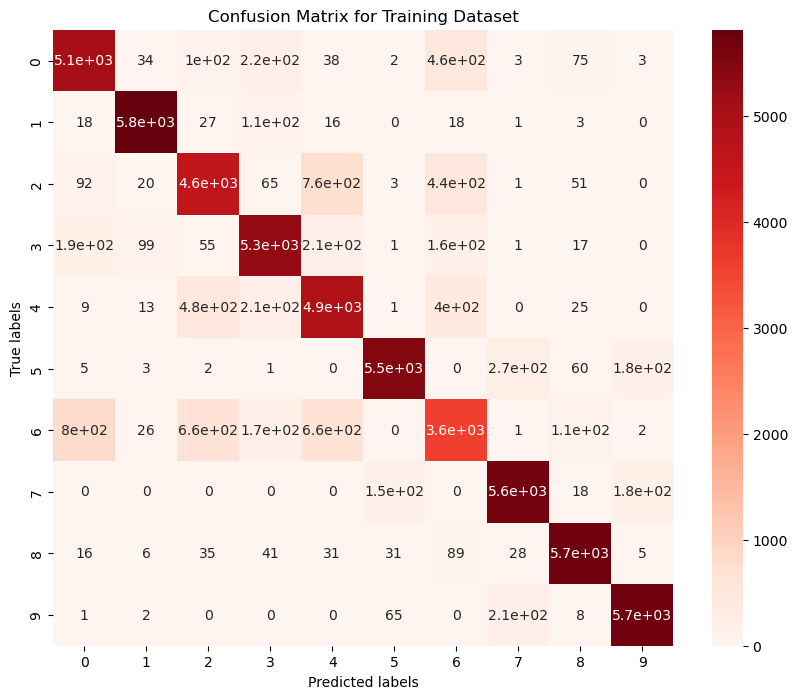

In [46]:
cm = confusion_matrix(y_train, y_predict_lr)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Training Dataset')
plt.show()

In [48]:
#Generating Confusion Matrix for Testing Dataset
confusion_matrix(y_test, y_predict_lr2)

array([[869,   4,  20,  21,   6,   0,  70,   0,  10,   0],
       [  0, 980,   1,  15,   0,   1,   3,   0,   0,   0],
       [ 12,   5, 818,   7,  97,   0,  57,   0,   4,   0],
       [ 24,   8,   8, 905,  25,   0,  28,   0,   2,   0],
       [  3,   2,  72,  17, 862,   0,  44,   0,   0,   0],
       [  0,   0,   2,   1,   1, 921,   0,  47,   6,  22],
       [118,   3,  89,  27,  82,   1, 670,   0,  10,   0],
       [  0,   0,   0,   0,   0,  25,   0, 947,   0,  28],
       [  4,   1,   9,   1,   2,   2,   9,   3, 967,   2],
       [  0,   0,   0,   0,   0,  12,   0,  30,   2, 956]], dtype=int64)

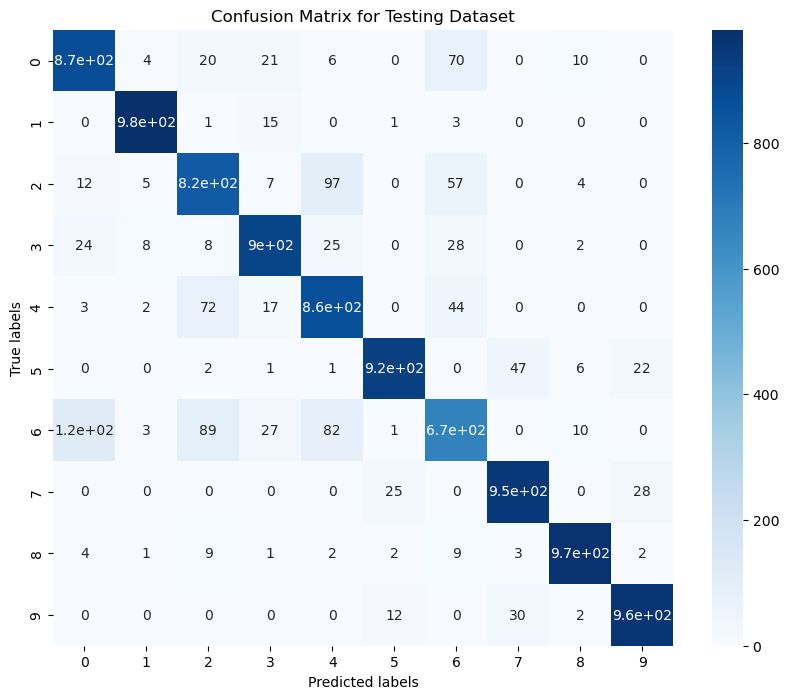

In [50]:
cm = confusion_matrix(y_test, y_predict_lr2)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Testing Dataset')
plt.show()

In [52]:
#importing cross validation package
from sklearn.model_selection import cross_val_score

# Initalizing the model to iterate
model = LogisticRegression(max_iter = 100)

#Performing cross-validation, 
#Doing with 4 folds
scores = cross_val_score(model, x_train, y_train, cv = 4)
print("Cross Validation score is: ", scores)
print("Mean of Cross-Validation score is: ", scores.mean())

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation score is:  [0.8482 0.8542 0.8494 0.8472]
Mean of Cross-Validation score is:  0.84975


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Classification Report and Accuracy Evaluation

**Training Data:**

Accuracy Score: 0.862 (or 86.2%) indicates that the logistic regression model correctly predicted the class for approximately 86.2% of the training instances.

**Training Classification Report:**

**Precision:** Indicates the proportion of correctly identified positive cases out of all predicted positives for each class. For example, for class 1, precision is 0.98, meaning 98% of instances predicted as class 1 are true positives.

**Recall:** Shows the proportion of actual positive cases correctly identified by the model. For class 1, recall is 0.98, meaning the model correctly identified 98% of all actual class 1 instances.

**F1-Score:** The harmonic mean of precision and recall, which balances both metrics. For class 1, the F1-score is 0.98, reflecting strong performance in both precision and recall.

**Accuracy:** The model’s accuracy on the training dataset is 0.89, meaning it correctly classified 89% of the training samples.

**Testing Data:**

**Accuracy Score:** 0.8895 (or 88.95%) indicates that the model correctly predicted the class for approximately 88.95% of the testing instances.
Testing Classification Report:

The metrics for the testing data are very similar to those for the training data, indicating that the model generalizes well to unseen data.

**2. Cross-Validation**

**Cross-Validation Scores:** [0.8482 0.8542 0.8494 0.8472]

**Mean Cross-Validation Score:** 0.84975

**Cross-Validation Scores:** These scores represent the model's performance on different folds of the data. For instance, the scores [0.8482, 0.8542, 0.8494, 0.8472] show how well the model performs on various subsets of the data.

**Mean Cross-Validation Score:** The average score across all folds, 0.84975, indicates the model’s average performance. This score provides a reliable estimate of the model's ability to generalize to unseen data.

**Model Assessment:** Cross-validation helps assess the model’s stability and performance by evaluating it on multiple subsets of the data. If the scores are consistent, it suggests that the model performs reliably across different subsets.

**Hyperparameter Tuning:** Cross-validation is often used in hyperparameter tuning to select the best model configuration. For example, you might perform grid search with cross-validation to find the optimal regularization parameter for the logistic regression model.

## Summary
Classification Report: Offers detailed performance metrics for each class, including precision, recall, F1-score, and overall accuracy, showing that the model performs well on both training and testing datasets.
Accuracy Evaluation: Confirms that the model is effective in classifying data, with similar performance on both training and testing sets.
Cross-Validation: Provides a robust estimate of the model’s performance and helps in tuning hyperparameters by evaluating the model on multiple folds of the data. The mean cross-validation score helps ensure that the model generalizes well to unseen data and is not overfitting.

7) Display Correct Prediction

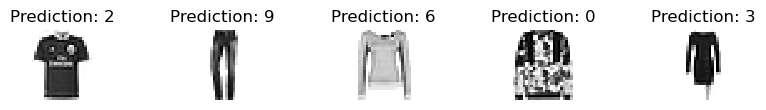

In [117]:
#Display corrected prediction
images_and_predictions = list(zip(training_dataset, y_predict_lr))

#visualise the misclassified images
plt.figure(figsize=(10,2))
for idx in range(5):
    image = x_test.iloc[idx].values.reshape(28,28)
    prediction = y_predict_lr[idx]
    plt.subplot(2,5,idx+1)
    plt.axis("off")
    plt.imshow(image.reshape(28,28),cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % int(prediction))
plt.show()

In [125]:
#display misclassified images with predicted labels
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_predict_lr):
    if label != predict: misclassifiedIndexes.append(index)
index +=1

misclassifiedIndexes[:5]

y_predict_lr[4]

np.array(y_test)[:5]

array([0, 1, 2, 2, 3], dtype=int64)

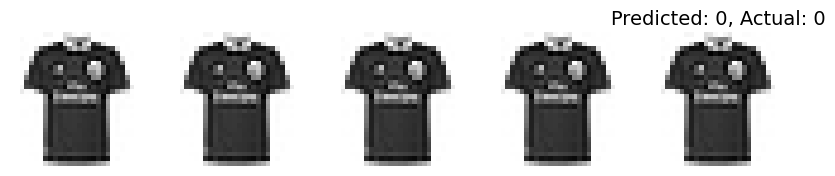

In [141]:
#visualise the corrected images
plt.figure(figsize=(10,2))
for plotIndex, ranIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.axis("off")
    plt.imshow(x_test.iloc[badIndex].values.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('Predicted: {}, Actual: {}'.format(y_predict_lr2[ranIndex], np.array(y_test)[ranIndex]), fontsize = 14)
plt.show()

In [ ]:
8) Regularization in Logistic 

This code use L2 regularization (Ridge regression) to train a logistic regression model. The regularization strength is set to 0.1, and the model is trained using a maximum of 100 iterations to achieve convergence. The training data, x_train and y_train, are used to fit the model.

Concept of Regularisation:
The purpose of regularization is to mitigate overfitting by introducing a penalty to the sizes of the model coefficients.

Categories:
The L1 Regularization (Lasso) technique imposes a penalty that is equivalent to the absolute value of the coefficients, therefore potentially causing some coefficients to approach zero.
L2 Regularization (Ridge) Introduces a penalty equivalent to the square of the coefficients, therefore facilitating a reduction in coefficient size without necessarily causing them to approach zero.

Its Mechanism of Overfitting Prevention:

**i. Minimizes the complexity of the model:**
Regularisation dampens the model's tendency to overfit to the training data by imposing penalties on big coefficients. Consequently, this leads to a more streamlined model that exhibits superior generalization to novel data.

**ii. Controls the magnitudes of coefficients:**
The inclusion of a penalty to the magnitude of the coefficients in regularization guarantees that no individual feature can exert excessive influence on the predictions. This technique prevents the phenomenon of overfitting to particular characteristics or noise present in the training data.

**iii. Enhances Generalization:**
Regularization facilitates the development of a model that exhibits reliable performance on unfamiliar data by mitigating the risk of excessive specificity to the training data.

Regularization in the Fashion-MNIST problem serves to moderate the complexity of the model and prevent excessive fit to the training data, therefore enhancing its generalization and performance on unfamiliar data. The successful application of regularization facilitates the construction of a resilient model that exhibits strong performance across diverse datasets and circumvents the drawbacks of overfitting.

In [87]:
lr_model = LogisticRegression(penalty = 'l2', C = 0.1, max_iter = 100)
lr_model.fit(x_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [89]:
y_predict_lr = lr_model.predict(x_train)

print('Predicted testing array: ', y_predict_lr)

Predicted testing array:  [2 9 6 ... 8 8 7]


9) Saving Model

In [143]:
import joblib

#For saving the file
filename = 'logistic_regression_model.pkl'

#Saving the trained model
joblib.dump(model, filename)

['logistic_regression_model.pkl']

In [ ]:
#Using the Saved Model for New Unseen Data
loaded_model = joblib.load('logistic_regression_model.pkl')

In [ ]:
# Example preprocessing step (assuming new_data is your new data)
# Replacing with actual preprocessing steps
new_data_preprocessed = preprocess_function(new_data)  

In [ ]:
# Predict dataset using the loaded model
predictions = loaded_model.predict(new_data_preprocessed)
print(predictions)  

By following these steps, we can ensure that this model can be efficiently reused for making predictions on new data without retraining, making it easier to integrate into production systems or for further analysis.